# RNA-Seq Data Analysis Pipeline Tutorial

RNA-seq tutorial pipeline from fastq files to differential expression.

## Basic Metadata

RNA-Seq data from 19 subjects with 3 replicates each, P8 samples are from Marginal Zone B cells and P9 samples are from follicular B cells, from both wild type and IgA Knockout mice. <br>


______________________________________________________________________________________________________________________

## Pipeline Overview

1) Generate genome Index file. <br>
2) Read Alignment (STAR). <br>
3) Assign reads to genes (featureCounts).<br> 
4) Compute CPM and RPKM (EdgeR Bioconductor package).<br> 
5) Filter non expressed genes.<br> 
6) Filter lowly expressed genes.<br> 
7) PCA.<br> 
8) Visualization (Clustergrammer).<br> 
9) Identify differentially expressed genes (Characteristic Direction).<br> 
10) Enrichment Analysis (Enrichr). <br>
11) Characteristic Direction Signature Search (L1000CDS2).<br>

______________________________________________________________________________________________________________________

Steps 1, 2 and 3 can be done with [align-map.sh](/Users/Carol/Documents/Jupyter_notebook_RNAseq_tutorial/align-map.sh) <br>
And Step 4 with [CPM-FPKM.r](/Users/Carol/Documents/Jupyter_notebook_RNAseq_tutorial/CPM-FPKM.r) <br>

______________________________________________________________________________________________________________________

After successfull completion of the above steps 1 - 4, you can start to analyze the processed expression matrix of gene expression in Python.

In [68]:
import pandas as pd
import numpy as np

In [69]:
## Assign the four variables: ctrl_ids and cond_ids; 
## ctrl_ids are the control samples; and pert_ids are the treatment samples.
## Make sure that there are at least two samples in each group to be able to perform the characteristic direction.
WTP8_ids = ['11-1163-Wt-P8','21-1165-Wt-P8', '31-1167-Wt-P8', '41-1169-Wt-P8']
WTP9_ids = ['2-1161-Wt-P9', '12-1163-Wt-P9', '22-1165-Wt-P9', '32-1167-Wt-P9', '42-1169-Wt-P9']
IgAKOP8_ids = ['16-1164-IgAKO-P8', '26-1166-IgAKO-P8', '36-1168-IgAKO-P8', '46-1170-IgAKO-P8', '6-1162-IgAKO-P8']
IgAKOP9_ids = ['17-1164-IgAKO-P9','27-1166-IgAKO-P9','37-1168-IgAKO-P9','47-1170-IgAKO-P9','7-1162-IgAKO-P9']

In [70]:
## Check the featureCount_output summary files for the alignment stats.
## This will output the first 10 lines of all summary files from the featureCounts folder
!head ../featureCount_output/*.summary 

head: ../featureCount_output/*.summary: No such file or directory


maayanlab@isabella:~/cdm/featureCount_output$ head /home/maayanlab/cdm/featureCount_output/*.summary,<br>
==> /home/maayanlab/cdm/featureCount_output/11-1163-Wt-P8.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/11-1163-Wt-P8Aligned.sortedByCoord.out.bam<br>
Assigned        21801137<br>
Unassigned_Ambiguity    341618<br>
Unassigned_MultiMapping 31929676<br>
Unassigned_NoFeatures   2803493<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/12-1163-Wt-P9.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/12-1163-Wt-P9Aligned.sortedByCoord.out.bam<br>
Assigned        23105766<br>
Unassigned_Ambiguity    363702<br>
Unassigned_MultiMapping 26166037<br>
Unassigned_NoFeatures   3506987<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/16-1164-IgAKO-P8.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/16-1164-IgAKO-P8Aligned.sortedByCoord.out.bam<br>
Assigned        21976115<br>
Unassigned_Ambiguity    331259<br>
Unassigned_MultiMapping 32706166<br>
Unassigned_NoFeatures   3552983<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/17-1164-IgAKO-P9.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/17-1164-IgAKO-P9Aligned.sortedByCoord.out.bam<br>
Assigned        21334140<br>
Unassigned_Ambiguity    342544<br>
Unassigned_MultiMapping 26502184<br>
Unassigned_NoFeatures   3490312<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/21-1165-Wt-P8.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/21-1165-Wt-P8Aligned.sortedByCoord.out.bam<br>
Assigned        21766502<br>
Unassigned_Ambiguity    334297<br>
Unassigned_MultiMapping 31851081<br>
Unassigned_NoFeatures   3844298<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/2-1161-Wt-P9.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/2-1161-Wt-P9Aligned.sortedByCoord.out.bam<br>
Assigned        20206111<br>
Unassigned_Ambiguity    327144<br>
Unassigned_MultiMapping 23157934<br>
Unassigned_NoFeatures   3058347<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/22-1165-Wt-P9.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/22-1165-Wt-P9Aligned.sortedByCoord.out.bam<br>
Assigned        23400691<br>
Unassigned_Ambiguity    371594<br>
Unassigned_MultiMapping 25620400<br>
Unassigned_NoFeatures   3363646<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/26-1166-IgAKO-P8.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/26-1166-IgAKO-P8Aligned.sortedByCoord.out.bam<br>
Assigned        22198989<br>
Unassigned_Ambiguity    336579<br>
Unassigned_MultiMapping 31882681<br>
Unassigned_NoFeatures   3186535<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>
==> /home/maayanlab/cdm/featureCount_output/27-1166-IgAKO-P9.count.txt.summary <==<br>
Status  /home/maayanlab/cdm/star_output/27-1166-IgAKO-P9Aligned.sortedByCoord.out.bam<br>
Assigned        22071305<br>
Unassigned_Ambiguity    348653<br>
Unassigned_MultiMapping 25042770<br>
Unassigned_NoFeatures   3050596<br>
Unassigned_Unmapped     0<br>
Unassigned_MappingQuality       0<br>
Unassigned_FragmentLength       0<br>
Unassigned_Chimera      0<br>
Unassigned_Secondary    0<br>
<br>

In [71]:
## Load the expression matrix - edgeR output
expr_df = pd.read_csv('repCpmMatrix_featureCounts.csv')
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()

,11-1163-Wt-P8,12-1163-Wt-P9,16-1164-IgAKO-P8,17-1164-IgAKO-P9,2-1161-Wt-P9,21-1165-Wt-P8,22-1165-Wt-P9,26-1166-IgAKO-P8,27-1166-IgAKO-P9,31-1167-Wt-P8,32-1167-Wt-P9,36-1168-IgAKO-P8,37-1168-IgAKO-P9,41-1169-Wt-P8,42-1169-Wt-P9,46-1170-IgAKO-P8,47-1170-IgAKO-P9,6-1162-IgAKO-P8,7-1162-IgAKO-P9
Gene,,,,,,,,,,,,,,,,,,,
Xkr4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,69.537658,59.638793,61.930874,60.935196,50.875698,61.378719,53.887298,57.029624,57.223621,50.889557,43.34727,47.783774,46.029174,58.289677,53.774432,59.040322,54.512558,64.932263,50.771364
Lypla1,113.526189,113.348330,111.075138,102.792988,112.985621,94.824607,102.219204,97.887341,108.376011,70.153890,78.99866,70.764827,76.036393,112.073642,112.696502,105.297693,121.449761,94.226028,89.829685


In [72]:
print expr_df.shape

(24391, 19)


In [73]:
## Filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print (expr_df.shape)

(16971, 19)


In [74]:
## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print (expr_df.shape)

(12491, 19)


In [75]:
expr_df.to_csv('expr_df.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, 
               index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', 
               line_terminator='\n', tupleize_cols=False, date_format=None, doublequote=True, 
               escapechar=None, decimal='.')

In [76]:
meta_df = pd.read_csv('metadata.txt', sep='\t')
print meta_df.shape
meta_df

(19, 4)


,Unnamed: 0,Condition,Short ID,Category
0,11-1163-Wt-P8,WT Marginal B cell,WT-11,WTM
1,12-1163-Wt-P9,WT Follicular B cell,WT-12,WTF
2,16-1164-IgAKO-P8,IgA KO Marginal B cell,KO-16,KOM
3,17-1164-IgAKO-P9,IgA KO Follicular B cell,KO-17,KOF
4,2-1161-Wt-P9,WT Follicular B cell,WT-2,WTF
5,21-1165-Wt-P8,WT Marginal B cell,WT-21,WTM
6,22-1165-Wt-P9,WT Follicular B cell,WT-22,WTF
7,26-1166-IgAKO-P8,IgA KO Marginal B cell,KO-26,KOM
8,27-1166-IgAKO-P9,IgA KO Follicular B cell,KO-27,KOF
9,31-1167-Wt-P8,WT Marginal B cell,WT-31,WTM


Now we have everything setup, the first thing to do is to generate PCA plots to observe whether the samples cluster as expected: controls with controls, and treatments with treatments.

In [77]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
# ignore FutureWarning that may pop up when plotting
import warnings
warnings.filterwarnings("ignore")

In [78]:
from IPython.core.display import HTML, display
# to display hyperlink as <a> tag in output cells
def display_link(url):
    raw_html = '<a href="%s" target="_blank">%s</a>' % (url, url)
    return display(HTML(raw_html))

In [79]:
import RNAseq

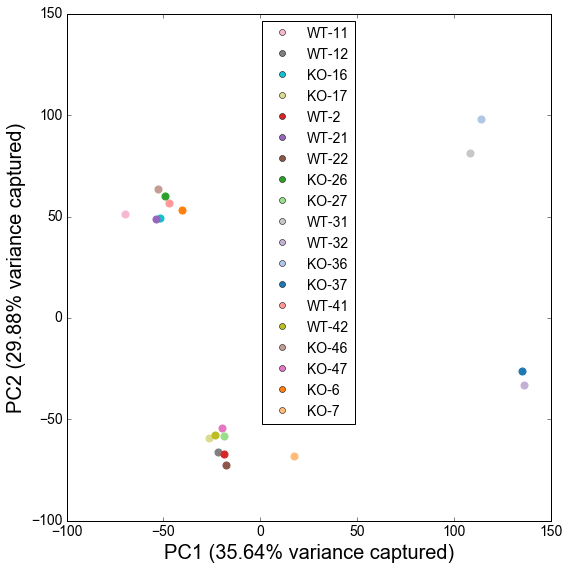

In [80]:
# plot PCA
%matplotlib inline
RNAseq.PCA_plot(expr_df.values, meta_df['Short ID'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper center')

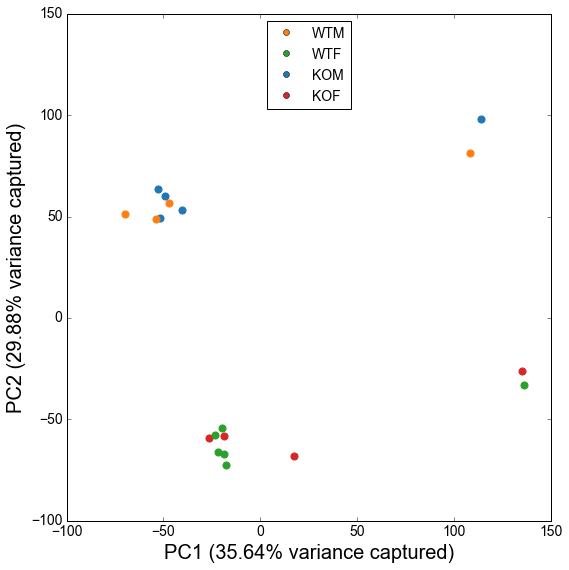

In [81]:
# plot PCA
%matplotlib inline
RNAseq.PCA_plot(expr_df.values, meta_df['Category'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper center')

Samples 37, 32, 36, 31 were outliers as seen on the PCA plot and were removed from the analysis.

In [82]:
## Load the expression matrix - edgeR output
expr_df = pd.read_csv('repCpmMatrix_featureCounts.csv')
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()
print expr_df.shape

(24391, 19)


In [83]:
#drop outliers
expr_df = expr_df.drop(['31-1167-Wt-P8','32-1167-Wt-P9','36-1168-IgAKO-P8','37-1168-IgAKO-P9'], axis=1)

In [84]:
## Filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print (expr_df.shape)

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print (expr_df.shape)

expr_df.to_csv('expr_df.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, 
               index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', 
               line_terminator='\n', tupleize_cols=False, date_format=None, doublequote=True, 
               escapechar=None, decimal='.')

(16390, 15)
(12052, 15)


In [85]:
meta_df = pd.read_csv('metadata_no_outliers.txt', sep='\t')
print meta_df.shape
meta_df = meta_df.sort_index(axis=0)
meta_df

(15, 4)


,Unnamed: 0,Condition,Short ID,Category
0,7-1162-IgAKO-P9,IgA KO Follicular B cell,KO-7,KoF
1,6-1162-IgAKO-P8,IgA KO Marginal B cell,KO-6,KoM
2,47-1170-IgAKO-P9,IgA KO Follicular B cell,KO-47,KoF
3,46-1170-IgAKO-P8,IgA KO Marginal B cell,KO-46,KoM
4,42-1169-Wt-P9,WT Follicular B cell,WT-42,WTF
5,41-1169-Wt-P8,WT Marginal B cell,WT-41,WTM
6,27-1166-IgAKO-P9,IgA KO Follicular B cell,KO-27,KoF
7,26-1166-IgAKO-P8,IgA KO Marginal B cell,KO-26,KoM
8,22-1165-Wt-P9,WT Follicular B cell,WT-22,WTF
9,21-1165-Wt-P8,WT Marginal B cell,WT-21,WTM


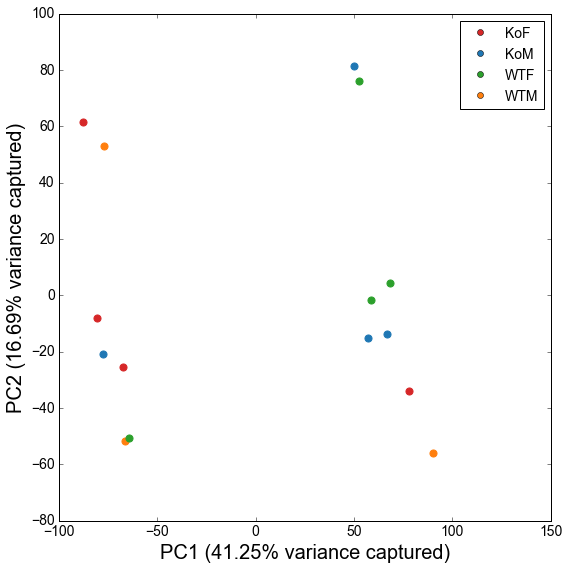

In [87]:
# plot PCA
%matplotlib inline
RNAseq.PCA_plot(expr_df.values, meta_df['Category'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper right')

## Visualization

We can visualize the gene expression matrix using Clustergrammer. Clustergrammer is a visualization tool that we developed to enable users and web-based applications to easily generate interactive and shareable clustergram-heatmap visualizations from a matrices of data. In the following code, we display a subset the expression matrix using genes with the largest variance. We then log transform and z-score center the expression matrix so that it has an average of zero, and a standard deviation of unity for each gene on the rows. We write the subset of expression matrix into a text file, and then use a HTTP POST of this file to the API of Clustergrammer. The API then responds with a URL to the interactive clustergram.

In [64]:
# Subset the expression DataFrame using top 800 genes with largest variance
variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print expr_df_sub.shape
expr_df_sub.head()

(800, 15)


,11-1163-Wt-P8,12-1163-Wt-P9,16-1164-IgAKO-P8,17-1164-IgAKO-P9,2-1161-Wt-P9,21-1165-Wt-P8,22-1165-Wt-P9,26-1166-IgAKO-P8,27-1166-IgAKO-P9,41-1169-Wt-P8,42-1169-Wt-P9,46-1170-IgAKO-P8,47-1170-IgAKO-P9,6-1162-IgAKO-P8,7-1162-IgAKO-P9
Gene,,,,,,,,,,,,,,,
Rn45s,2413.222760,2666.823511,6571.134161,4631.309254,1753.034020,2922.196686,1941.823000,2632.597367,1948.955895,8006.601673,8070.209369,10437.204774,7045.461548,2440.112137,1780.516106
Cd74,16226.126188,19569.920339,15676.565216,21334.349545,21218.828304,17458.661938,21208.262611,16150.600372,20382.392432,16775.711996,21266.776704,16183.762927,21082.238864,16144.149443,20125.278786
Cr2,3001.219615,882.809944,3296.624540,805.657036,957.730065,3411.434690,867.495750,3682.600140,891.111785,2994.875204,790.300306,2845.872828,673.498296,3381.787441,762.060359
Psap,4121.344680,1880.915785,4120.018484,1838.789846,1790.695894,4359.772645,1838.920056,4252.671146,1784.171801,3933.960310,1636.948863,3916.855311,1489.582004,4194.948162,1729.833815
Eef2,10465.050515,8295.245438,10997.439720,8660.672518,7875.043347,10232.420441,8055.360416,10559.219611,8514.539580,9190.180907,7568.038904,9973.337848,7992.302038,9933.736243,7583.237647


In [65]:
# Log transform and z-score standardize the data and write to a .txt file 
expr_df_sub.index.name=''
expr_df_sub = np.log1p(expr_df_sub)
expr_df_sub = expr_df_sub.apply(lambda x: (x-x.mean())/x.std(ddof=0), axis=1)
# prettify sample names
#sample_names = ['-'.join([x, d_layout_platform[y], z]) for x,y,z in
#                   zip(meta_df['infection_status_s'], meta_df['LibraryLayout_s'], expr_df_sub.columns)]
#expr_df_sub.columns = sample_names
expr_df_sub.to_csv('expression_matrix_top800_genes.txt', sep='\t')
expr_df_sub.head()

,11-1163-Wt-P8,12-1163-Wt-P9,16-1164-IgAKO-P8,17-1164-IgAKO-P9,2-1161-Wt-P9,21-1165-Wt-P8,22-1165-Wt-P9,26-1166-IgAKO-P8,27-1166-IgAKO-P9,41-1169-Wt-P8,42-1169-Wt-P9,46-1170-IgAKO-P8,47-1170-IgAKO-P9,6-1162-IgAKO-P8,7-1162-IgAKO-P9
,,,,,,,,,,,,,,,
Rn45s,-0.646343,-0.483020,0.991149,0.419218,-1.168692,-0.333547,-1.001546,-0.504133,-0.995553,1.314168,1.327105,1.747604,1.105095,-0.628232,-1.143272
Cd74,-1.103725,0.422473,-1.384376,1.125621,1.081396,-0.507381,1.077339,-1.141726,0.753808,-0.832410,1.099781,-1.125018,1.028793,-1.144980,0.650405
Cr2,0.956575,-0.826925,1.093452,-0.960146,-0.708254,1.143366,-0.852418,1.254887,-0.813289,0.953490,-0.988179,0.879086,-1.221107,1.130640,-1.041180
Psap,1.056894,-0.753050,1.056151,-0.805306,-0.866447,1.186678,-0.805142,1.129280,-0.874867,0.949513,-1.073535,0.939457,-1.291149,1.097743,-0.946218
Eef2,1.202606,-0.632791,1.594569,-0.292271,-1.043404,1.025034,-0.864581,1.273367,-0.426688,0.176478,-1.357498,0.822457,-0.926658,0.791029,-1.341651


In [66]:
# POST the expression matrix to Clustergrammer and get the URL
import requests, json

clustergrammer_url = 'http://amp.pharm.mssm.edu/clustergrammer/matrix_upload/'
files={'file': open('expression_matrix_top800_genes.txt', 'rb')}

r = requests.post(clustergrammer_url, files=files)

link = r.text
link

u'http://amp.pharm.mssm.edu/clustergrammer/viz/573a2a0e9c82a419de175480/expression_matrix_top800_genes.txt'

In [67]:
from IPython.display import IFrame
display(IFrame(link, width="1000", height="900"))

## Characteristic direction

Now we are ready to identify the differentially expressed genes between the two sets of samples: control vs. treatment. We will achieve this using the Characteristic Direction method6 that we developed and published in BMC Bioinformatics in 2014.
An implementation in Python of the Characteristic Direction method can be downloaded and installed from here: https://github.com/wangz10/geode.

In [479]:
# clean the sample/column names 
sample_names = [c.split('-', 2)[2] for c in expr_df.columns[0:]]
print sample_names
expr_df.columns = sample_names

# print expr_df.head()

['Wt-P8', 'Wt-P9', 'IgAKO-P8', 'IgAKO-P9', 'Wt-P9', 'Wt-P8', 'Wt-P9', 'IgAKO-P8', 'IgAKO-P9', 'Wt-P8', 'Wt-P9', 'IgAKO-P8', 'IgAKO-P9', 'IgAKO-P8', 'IgAKO-P9']


In [480]:
import geode
cd_results = pd.DataFrame(index=expr_df.index)

expr_df=expr_df.rename(columns = {'Wt-P8':1,'Wt-P9':1,'IgAKO-P8':2, 'IgAKO-P9':2})

sample_class = list(expr_df.columns.values)

cd_res = geode.chdir(expr_df.values, sample_class, expr_df.index, gamma=.5, sort=False, calculate_sig=False)
cd_coefs = np.array(map(lambda x: x[0], cd_res))

# sort CD in by absolute values in descending order
srt_idx = np.abs(cd_coefs).argsort()[::-1]
cd_coefs = cd_coefs[srt_idx][:600]
sorted_DEGs = expr_df.index[srt_idx][:600]

# split up and down
up_genes = dict(zip(sorted_DEGs[cd_coefs > 0], cd_coefs[cd_coefs > 0]))
dn_genes = dict(zip(sorted_DEGs[cd_coefs < 0], cd_coefs[cd_coefs < 0]))

#print cd_res


In [481]:
up_genes_cd = pd.DataFrame(up_genes.items())
print up_genes_cd.head()
up_genes_cd.to_csv('up_genes_cd.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, 
               index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', 
               line_terminator='\n', tupleize_cols=False, date_format=None, doublequote=True, 
               escapechar=None, decimal='.')

       0         1
0   Sell  0.013718
1  Otud4  0.016149
2   Lyl1  0.012062
3  Csde1  0.016991
4  Setd5  0.010807


In [482]:
dn_genes_cd = pd.DataFrame(dn_genes.items())
print dn_genes_cd.head()
dn_genes_cd.to_csv('dn_genes_cd.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, 
               index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', 
               line_terminator='\n', tupleize_cols=False, date_format=None, doublequote=True, 
               escapechar=None, decimal='.')


         0         1
0    Sorl1 -0.044347
1    Capzb -0.015112
2  Cyp4f18 -0.025988
3     Apoe -0.015507
4  Chordc1 -0.010975


## Enrichment Analysis 

Enrichr is gene set enrichment analysis tool that we developed. Enrichr compares the up or down gene sets computed here with over ~180,000 annotated gene sets belonging to ~90 gene set libraries covering pathway databases, ontologies, disease databases and more.

The up, down and combined Characteristic Direction signature lists were uploaded to Enrichr.

Up list: http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=6lle <br>
Down list: http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=6llf <br>
Combined list: http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=6llg <br>

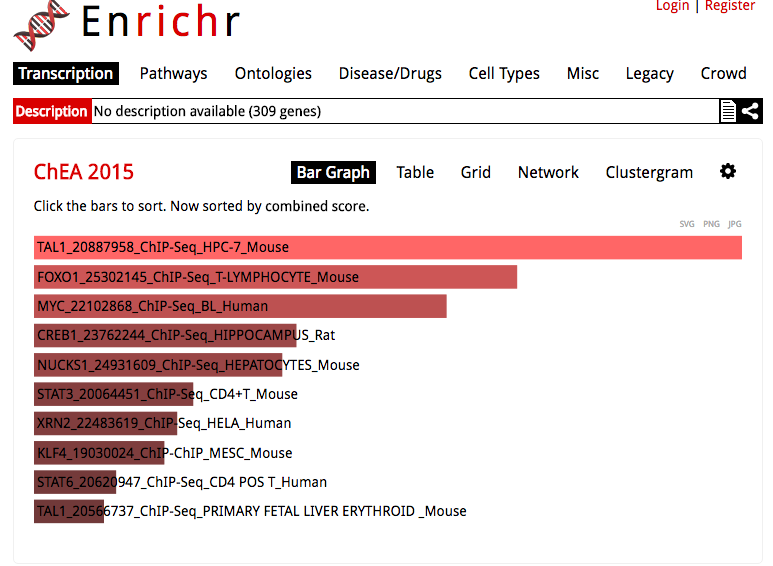

In [483]:
from IPython.display import Image
Image('Enrichr_up.png', width='600')

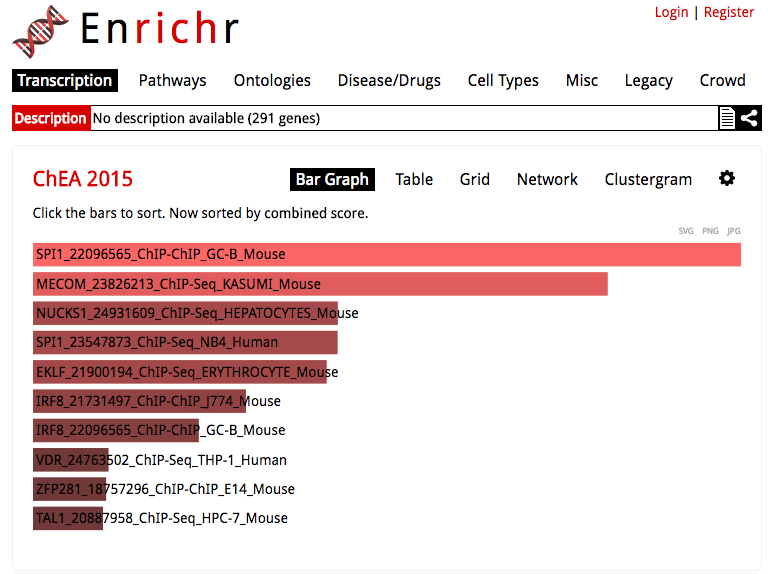

In [484]:
from IPython.display import Image
Image('Enrichr_dn.png', width='600')

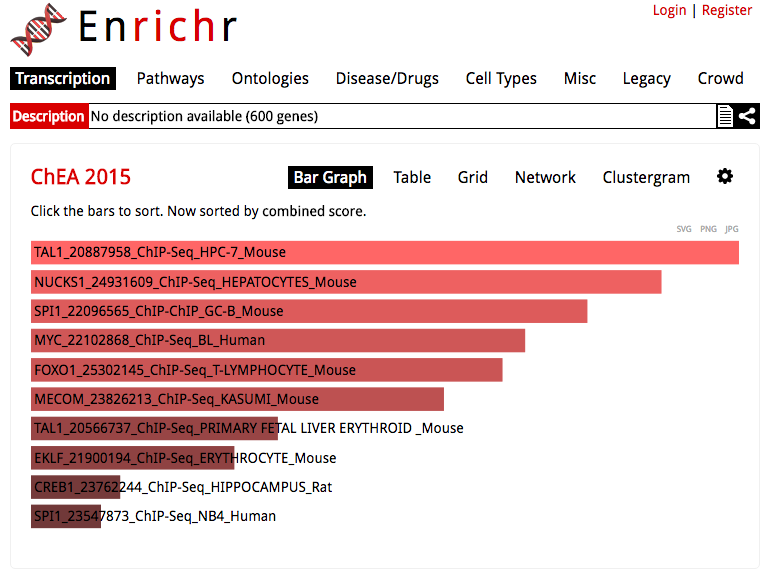

In [485]:
from IPython.display import Image
Image('Enrichr_combined.png', width='600')

## L1000CDS2

Next we would like to identify small molecules that can either reverse or mimic the induced gene expression with the LINCS L1000 data. For this we will utilize L1000CDS2, a small molecule gene expression signature search engine that we developed. L1000CDS2 contains gene expression signatures from ~30,000 small molecules profiled with the L1000 technology for the LINCS program. Users can search for small molecules that can potentially reverse or mimic their input gene expression signatures.

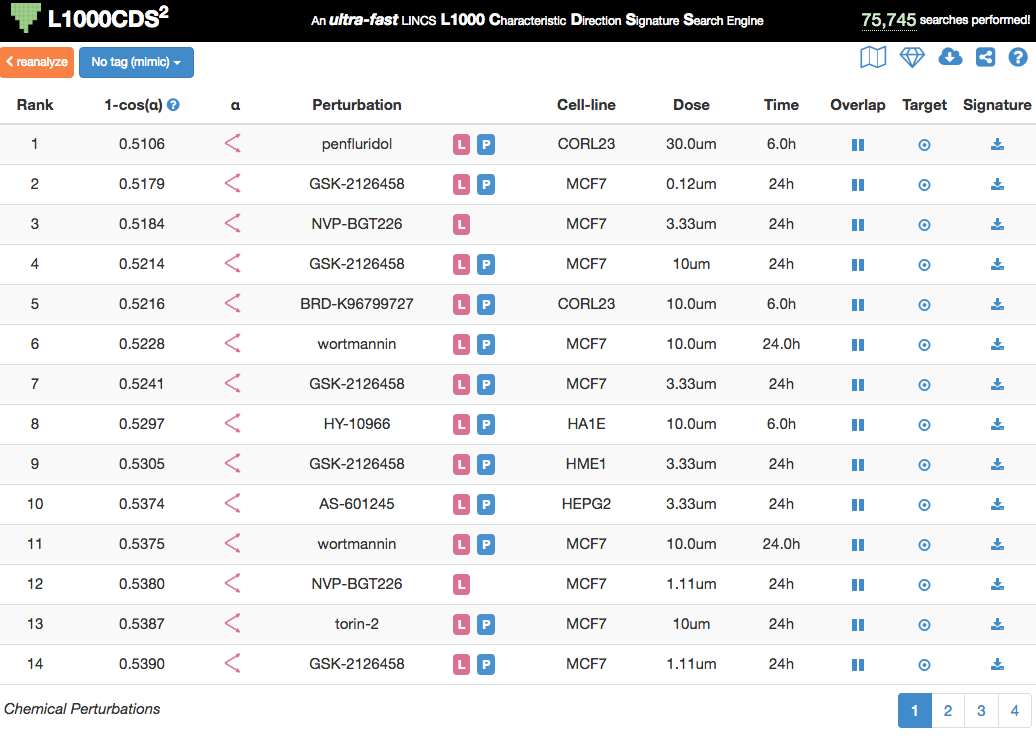

In [486]:
from IPython.display import Image
Image('L1000CDS2_up_mimic.png', width='700')

Up_mimic http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366da76832f28301aa0b57 <br>
Up_reverse http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366d8b6832f28301aa0b55 <br>
Down_mimic http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366df86832f28301aa0b5b <br>
Down_reverse http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366e0c6832f28301aa0b5d <br>
Combined_mimic http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366e4e6832f28301aa0b61 <br>
Combined_reverse http://amp.pharm.mssm.edu/L1000CDS2/#/result/57366e426832f28301aa0b5f <br>